# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad haikal syafi alawiy
- **Email:** muhammadhaikalsyafialawiy@mail.ugm.ac.id
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

**PERTANYAAN BISNIS**
- Berapa besar pengaruh Hari Kerja dan Hari libur pada penyewaan sepeda?
- Bagaimana  pengaruh kondisi iklim/cuaca pada penyewaan sepeda?
- Bagaimana perkembangan penyewaan sepeda pertahunnya?

## Import Semua Packages/Library yang Digunakan

## Data Wrangling

### Gathering Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('D:\Bangkit\Analisis\Project\Data\hour.csv')

In [14]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Penjelasan fitur:**
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered 

Dari sini kita bisa melihat dataset terdiri dari 16 fitur yang  berbentuk kategorikal dan numerik

### Assessing Data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB



- data terdiri dari 17379 dan Tipe data yang ada didalam data berbentuk Float , Integer , object


In [16]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


- Data tidak memiliki nilai null atau kosong sehingga tidak perlu penanganan missing value

In [17]:
df.duplicated().sum()

np.int64(0)

- Data tidak ada yang terduplikat

**Insight:**
- Data yang kita pakai sudah bagus karena tidak memiliki missing value dan tida ada data yang terduplikat 

### Cleaning Data

In [18]:
df.drop(columns=['dteday'], inplace=True)
df.drop(columns=['instant'], inplace=True)

**Insight:**
- Data yang dipakai sudah memenuhi kriteria yang bagus tetapi beberapa kolom disini tidak diperlukan dalam proses analisis seperti instant yang hanya indeks
dan kolom "dteday" yang tidak memberikan nilai tambah yang signifikan dalam analisis untuk menjawab pertanyaan kita ,selain itu informasi didalamnya sudah diekstrak di kolom month , day , dan year

## Exploratory Data Analysis (EDA)

### Explore Data

In [21]:
df.describe(include="all")

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Data Distribution

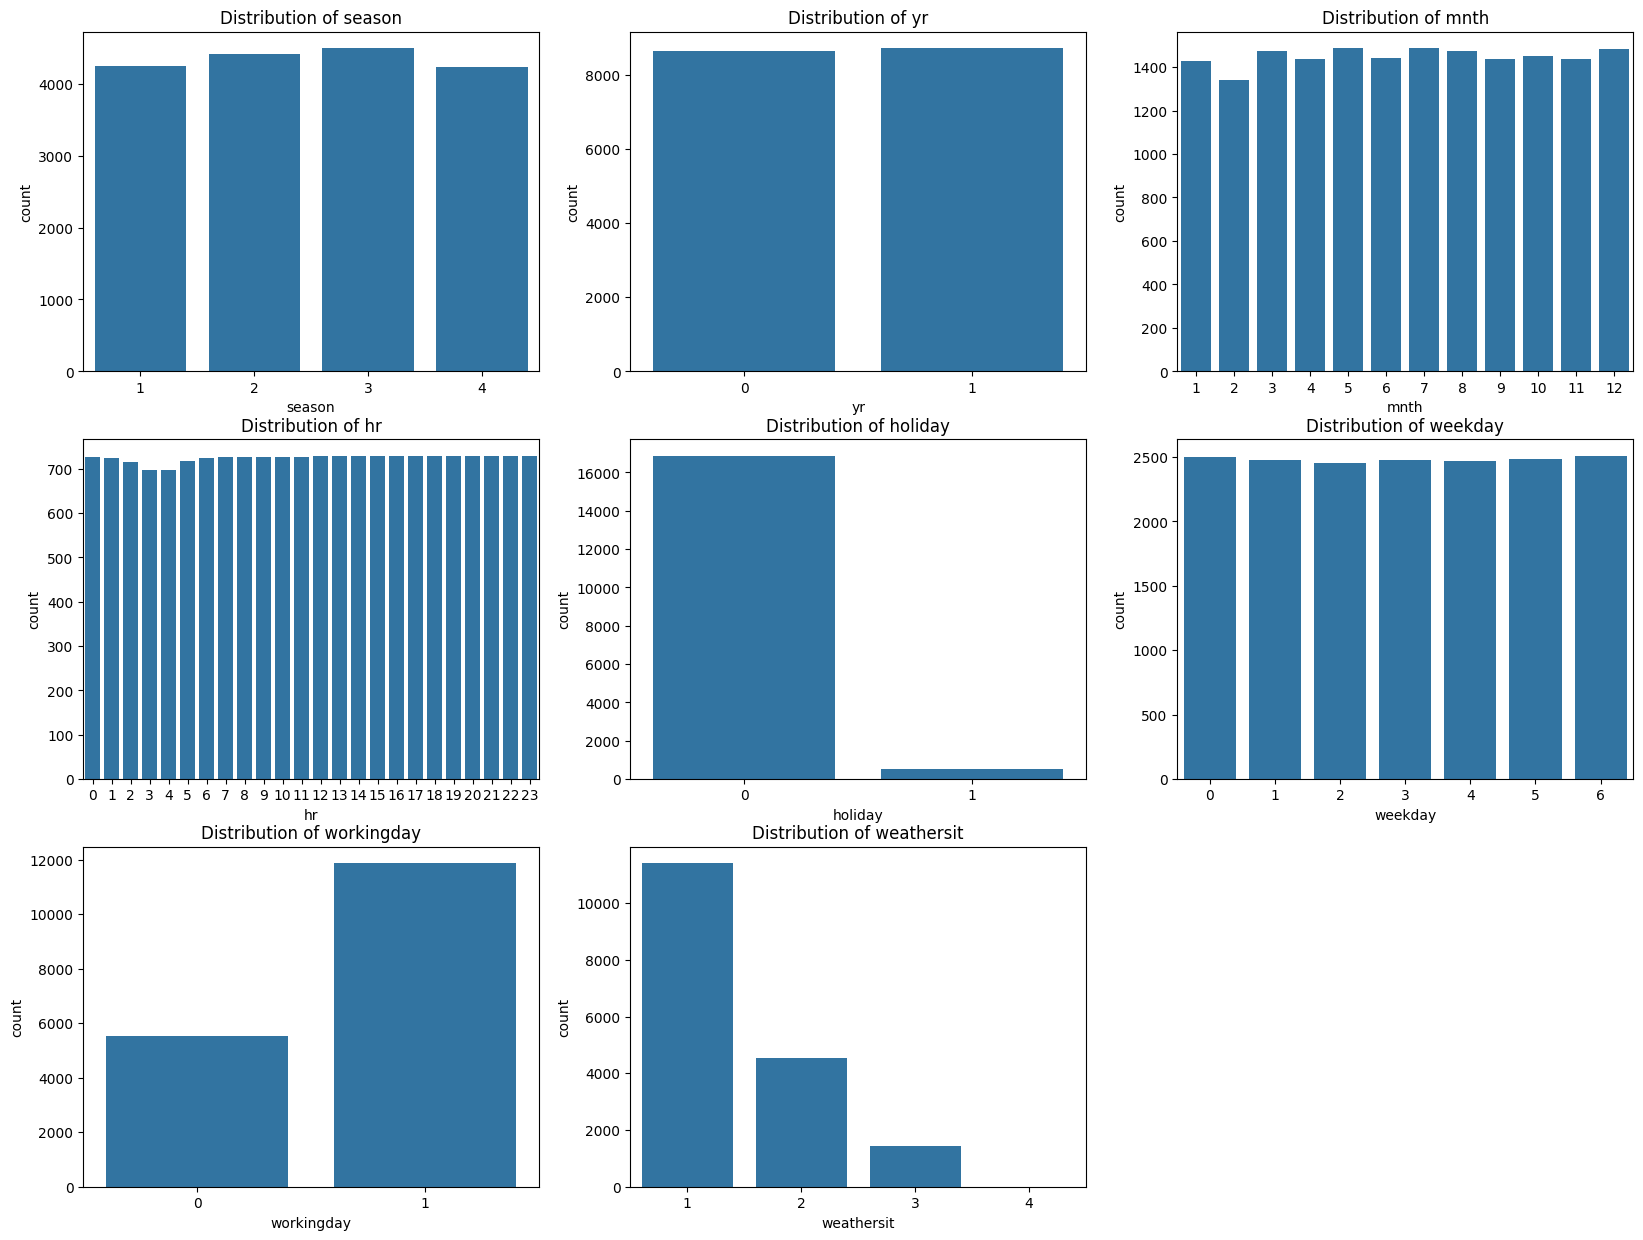

In [28]:
plt.figure(figsize=(20, 15))

# List of categorical variables
categorical_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Plot distribution of each categorical variable
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution of {var}')

**Analisi Data Kategorikal**

Diagram batang  diatas berguna untuk melihat distribusi data kategorikal 
- distribusi untuk data season , yr , mnth , hr , weekday memiliki distribusi yang merata 
- untuk workingday lebih banyak di Kategori 1 yaitu kategori weekday (hari kerja)
- holiday Kebanyakan di kategori 0 (tidak liburan/holiday) , 
-  data weathersit lebih banyak di Kategori 1 (Cuaca Bagus) dan menurun untuk kategori 2 , kategori 3 , kategori 4 (dimana menunjukan Ketika cuaca semakin buruk lebih sedikit distribusinya)

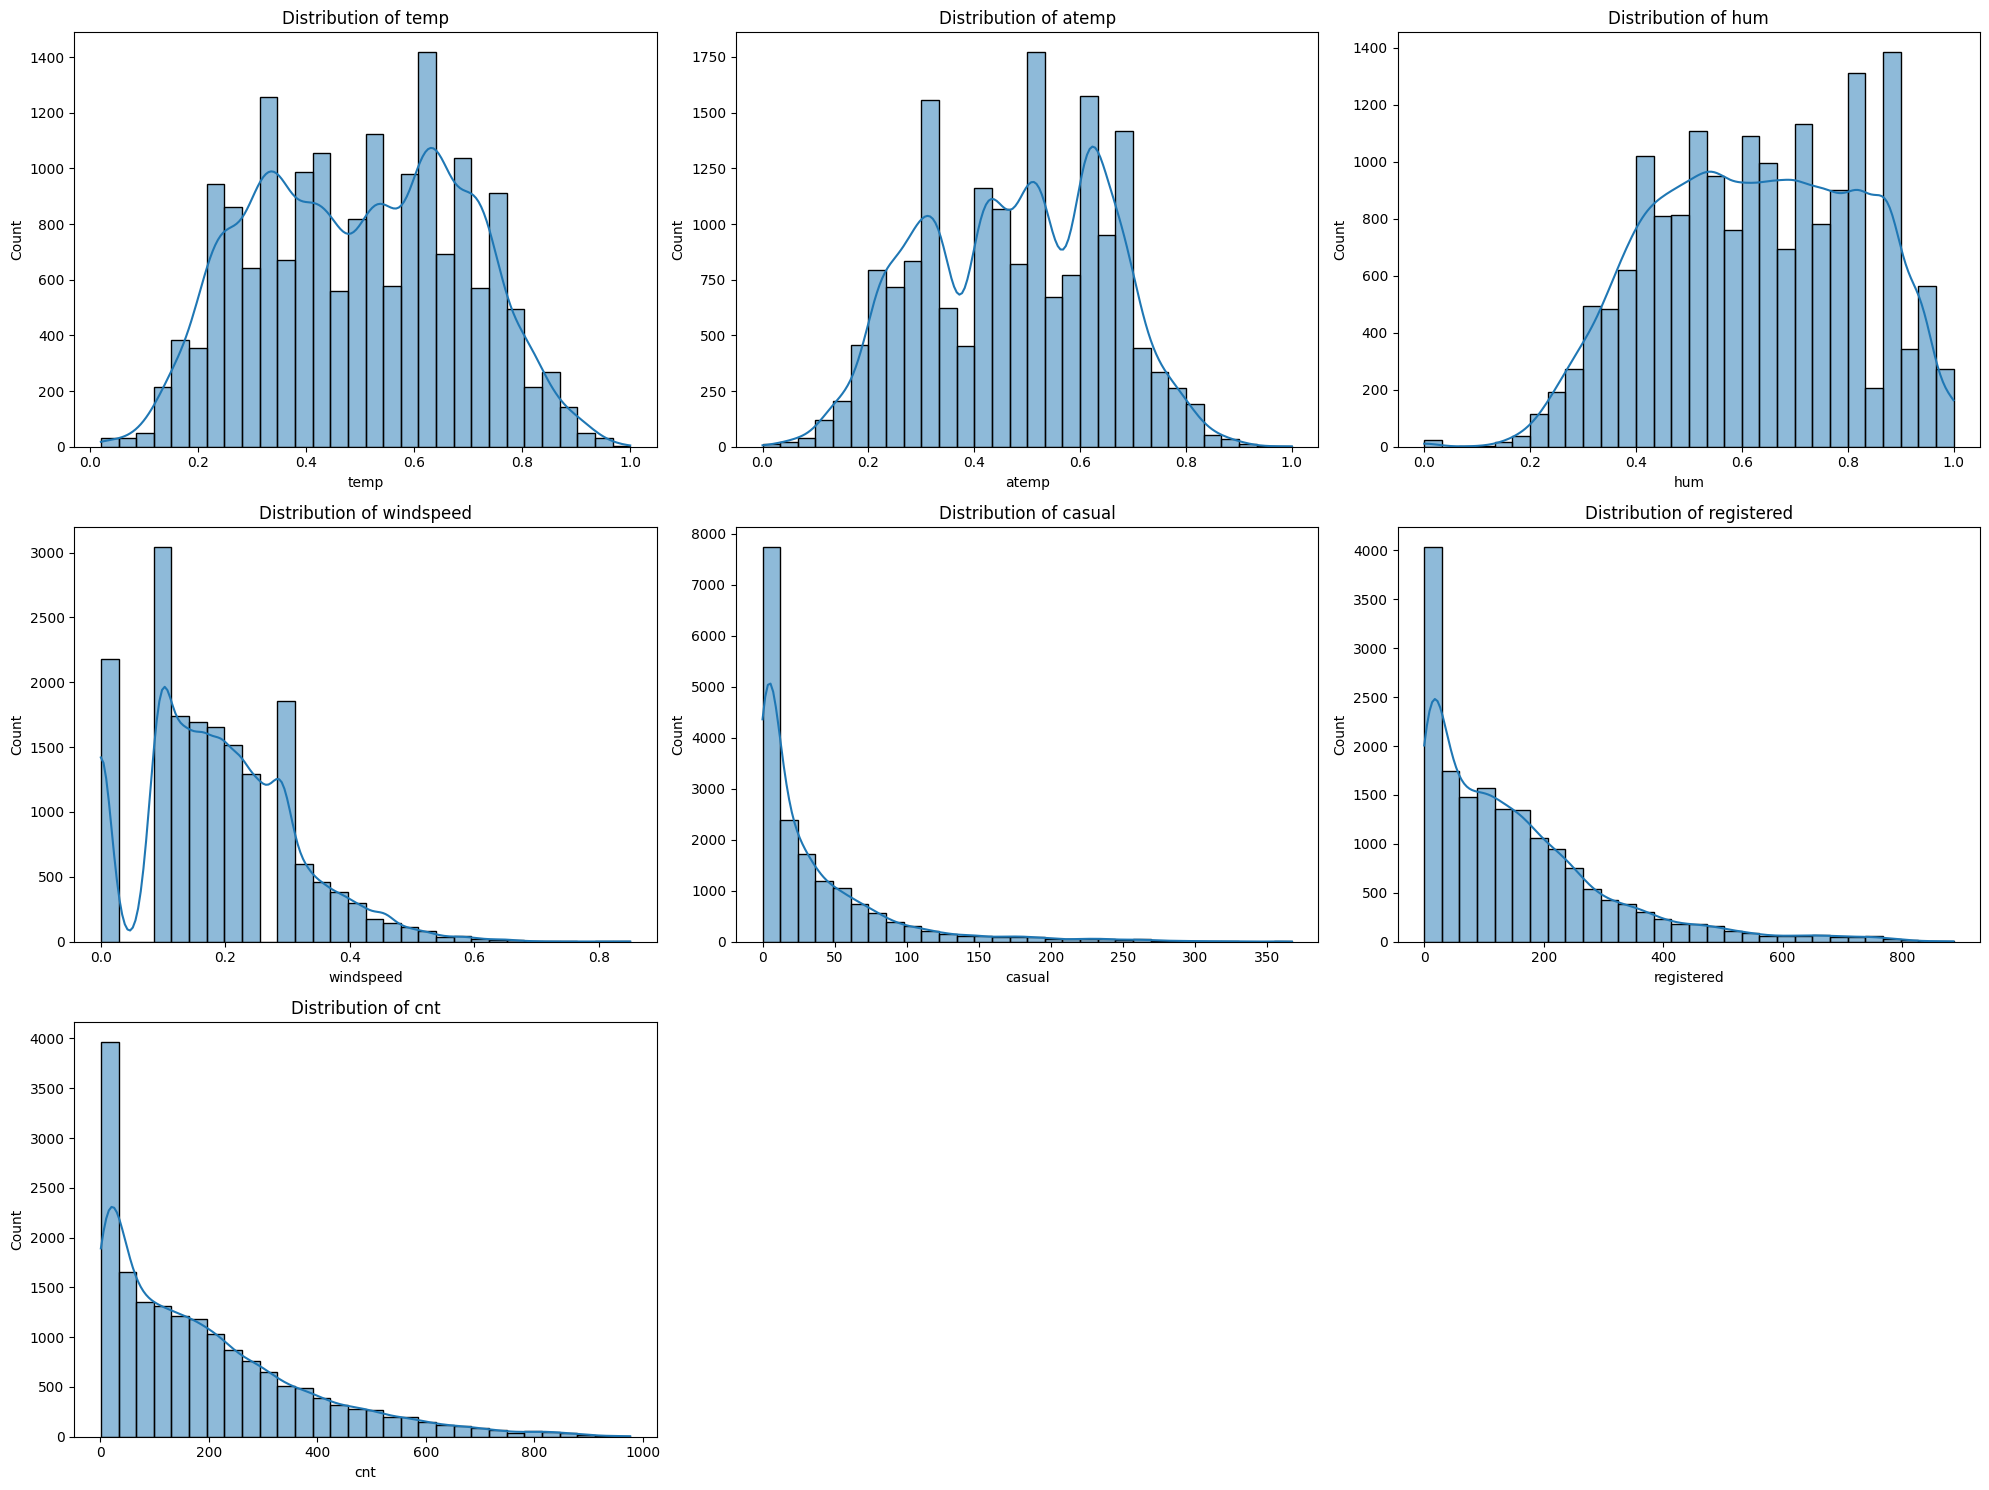

In [29]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# List of numerical variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Plot distribution of each numerical variable
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

**Analisis distribusi data numerikal**

Analisis ini berguna untuk melihat distribusi data numerikal
- untuk data temp dan atemp cukup mirip karena hanya berbeda cara menormalisasikan menjadi celcius(temp suhu asli dan atemp suhu yang dirasakan manusia) dan distribusi mendekati distribusi normal
- untuk data Windspeed , casual , registered , cnt(Casual + Registered) cenderung Right Skewed menunjukan sebagian besar populasi data yang terkonsentrasi pada bagian kiri. Distribusi data ini memiliki nilai mean lebih besar dari nilai median dan juga mode.

### Variable corelation

**SCATTER PLOT NUMERICAL VARIABLE VS CNT(JUMLAH SEWA)**

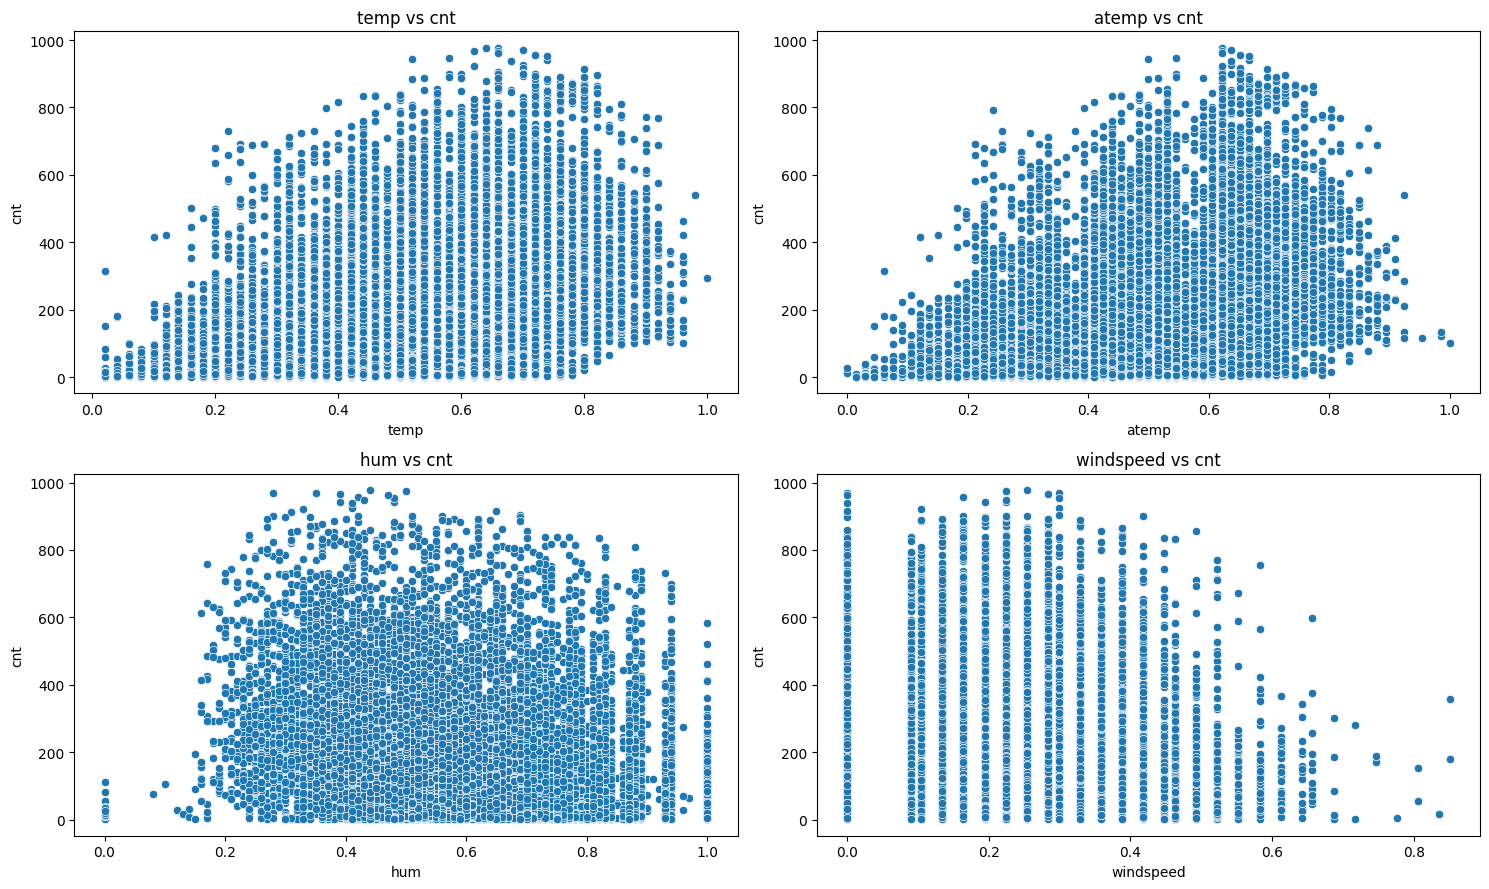

In [33]:
plt.figure(figsize=(15, 9))

# List of numerical variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed']

# Plot scatter plots for numerical variables vs cnt
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=var, y='cnt')
    plt.title(f'{var} vs cnt')

plt.tight_layout()
plt.show()

**Analisis Scatter plot**

Scatter Plot ini bertujuan untuk mencari hubungan antara variabel numerik terhadap jumlah sewa sepeda 
- Hubungan temp dan atemp terhadap cnt(Jumlah sewa)  berkorelasi positif dimana cnt cenderung naik saat temp dan atemp naik 
- Hubungan windspeed dan cnt(Jumlah sewa) berkolerasi negatif dimana cnt cenderung turun saat windspeed naik
- Hubungan hum dengan cnt(Jumlah sewa) sedikit kompleks dimana cnt tertinggi di range humidity (0.2-0.6)

**BOX PLOT CATEGORICAL VARIABLE VS CNT(JUMLAH SEWA)**

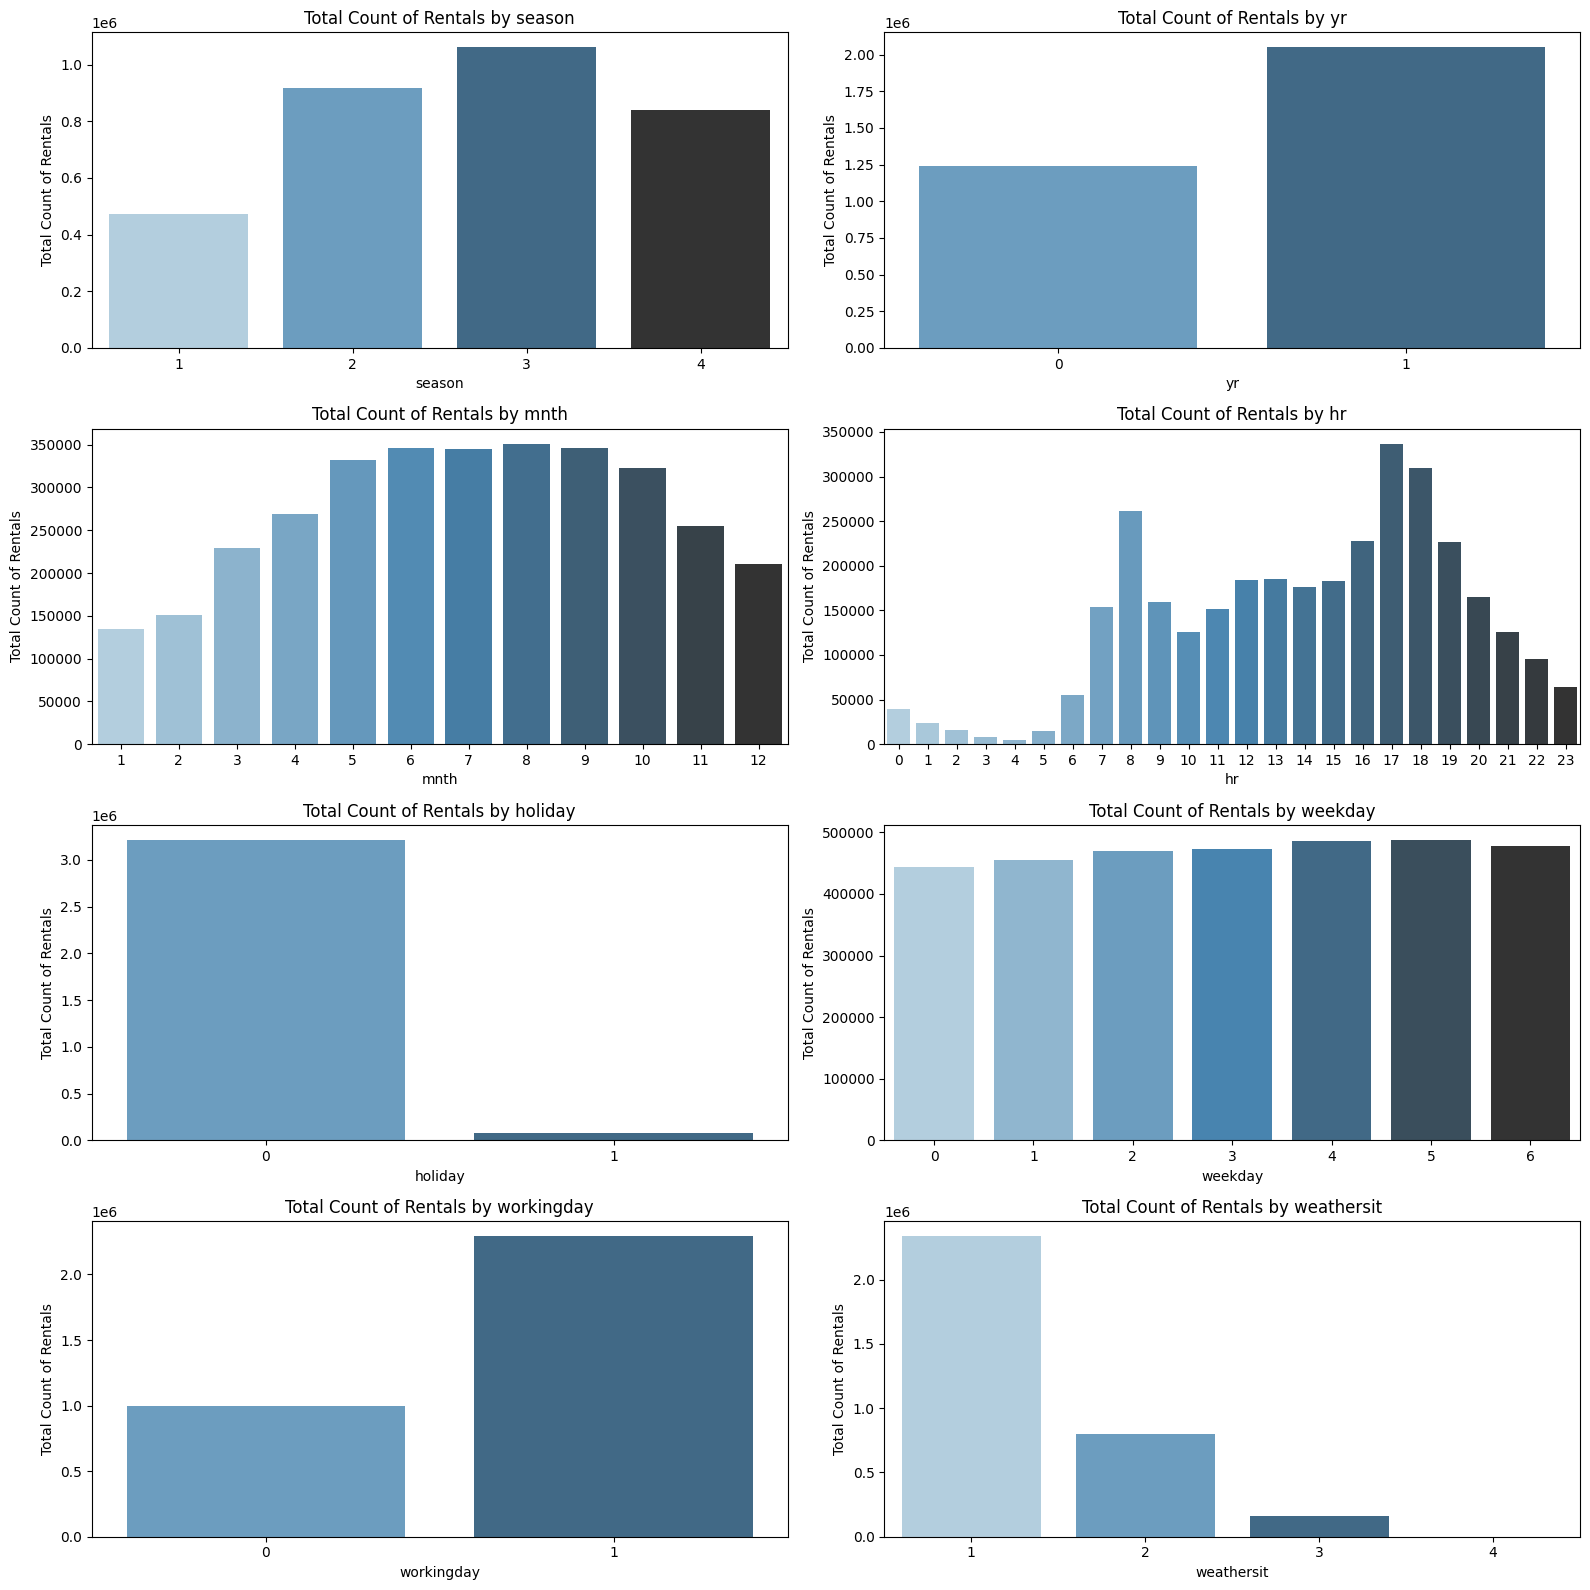

In [10]:
categorical_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Buat figure untuk bar plot
plt.figure(figsize=(16, 16))

# Buat bar plot untuk setiap variabel kategorikal
for i, var in enumerate(categorical_vars):
    plt.subplot(4, 2, i + 1)  # 4 baris, 2 kolom
    # Menghitung total cnt per kategori
    total_cnt = df.groupby(var)['cnt'].sum().reset_index()
    sns.barplot(data=total_cnt, x=var, y='cnt', palette='Blues_d', hue=var, legend=False)
    plt.title(f'Total Count of Rentals by {var}')
    plt.xlabel(var)
    plt.ylabel('Total Count of Rentals')
    

plt.tight_layout()
plt.show()

**Analisis Box Plot Categorical variable vs cnt(Jumlah Sewa)**

Box Plot ini bertujuan untuk mencari jumlah sewa untuk tiap kategori di dalam Categorical variable
- Untuk Season jumlah sewa terbanyak ada Di kategori 3 (fall) , diikuti dengan kategori 2 (summer) lalu 4 (winter) , dan yang terendah adalah kategori 1(springer)
- Untuk year (Tahun) Jumlah sewa lebih banyak dikategori 2 (2012) dibanding kategori 1 (2011)
- untuk mnth (Bulan) Jumlah sewa tertinggi di bulan 8 terendah di bulan 1 dan cenderung pada  bulan 5-10 dan menurun di bulan 11-12
- untuk hr (Jam) Jumlah sewa tertinggi pada jam 17:00 dan terendah pada jam 4:00 , diagram cenderung left skewed dimana data kebanyakan terdistribusi ke kanan
- untuk holiday(Libur) Jumlah sewa sangat tinggi saat kategori 0 (tidak libur) dan sangat sedikit di kategori 1(Libur)
- untuk weekday Jumlah sewa cenderung merata dari kategori 0-6 (Minggu-Sabtu) 
- untuk workingday Jumlah sewa lebih banyak di kategori 1 (hari kerja) dibanding kategori 0 (bukan hari kerja)
- untuk weathersit Jumlah sewa Lebih banyak di Kategori 1 (Clear, Few clouds, Partly cloudy, Partly cloudy), Lalu semakin menurun semakin buruknya cuaca

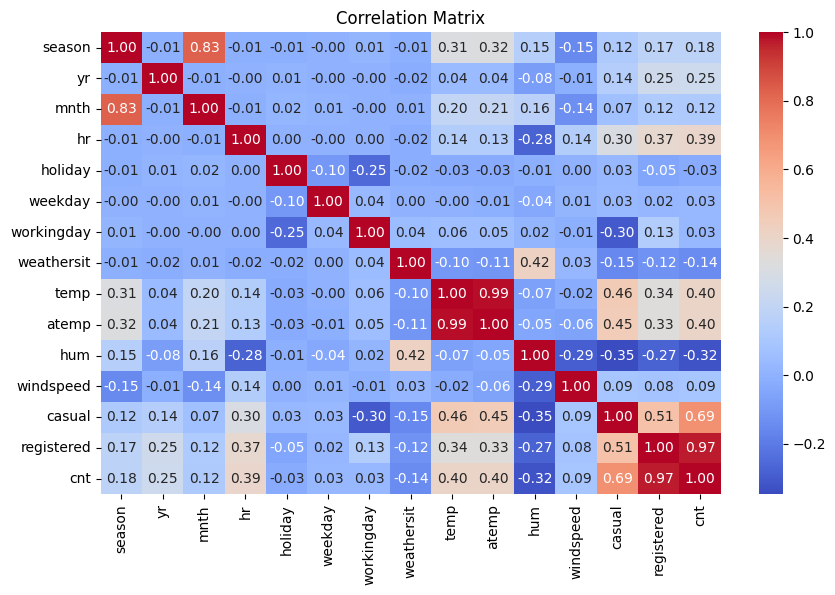

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Analisis matrik korelasi**
- Temp dan atemp berkorelasi positif dengan Jumlah sewa
- Season , yr , month , weekday , workingday , windspeed berkorelasi positif dengan jumlah sewa meski tidak sebesar temp dan atemp
- holiday , weathersit , hum berkolerasi negatif dengan Jumlah sewa
- casual dan registered memiliki korelasi yang sangat tinggi dengan jumlah sewa mengindikasikan redudansi  

**Insight From EDA:**
- Suhu (temp/atemp) Berepengaruh pada jumlah sewa sepeda 
- Hari Kerja , Hari libur sangat berpengaruh pada Jumlah sewa sepeda
- Kecepatan angin berpengaruh pada Jumlah sewa sepeda
- jumlah sewa sepeda naik dalam satu tahun terakhir
- keadaan cuaca sangat berpengaruh pada jumlah sewa sepeda 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa besar pengaruh Hari Kerja dan Hari libur pada penyewaan sepeda?

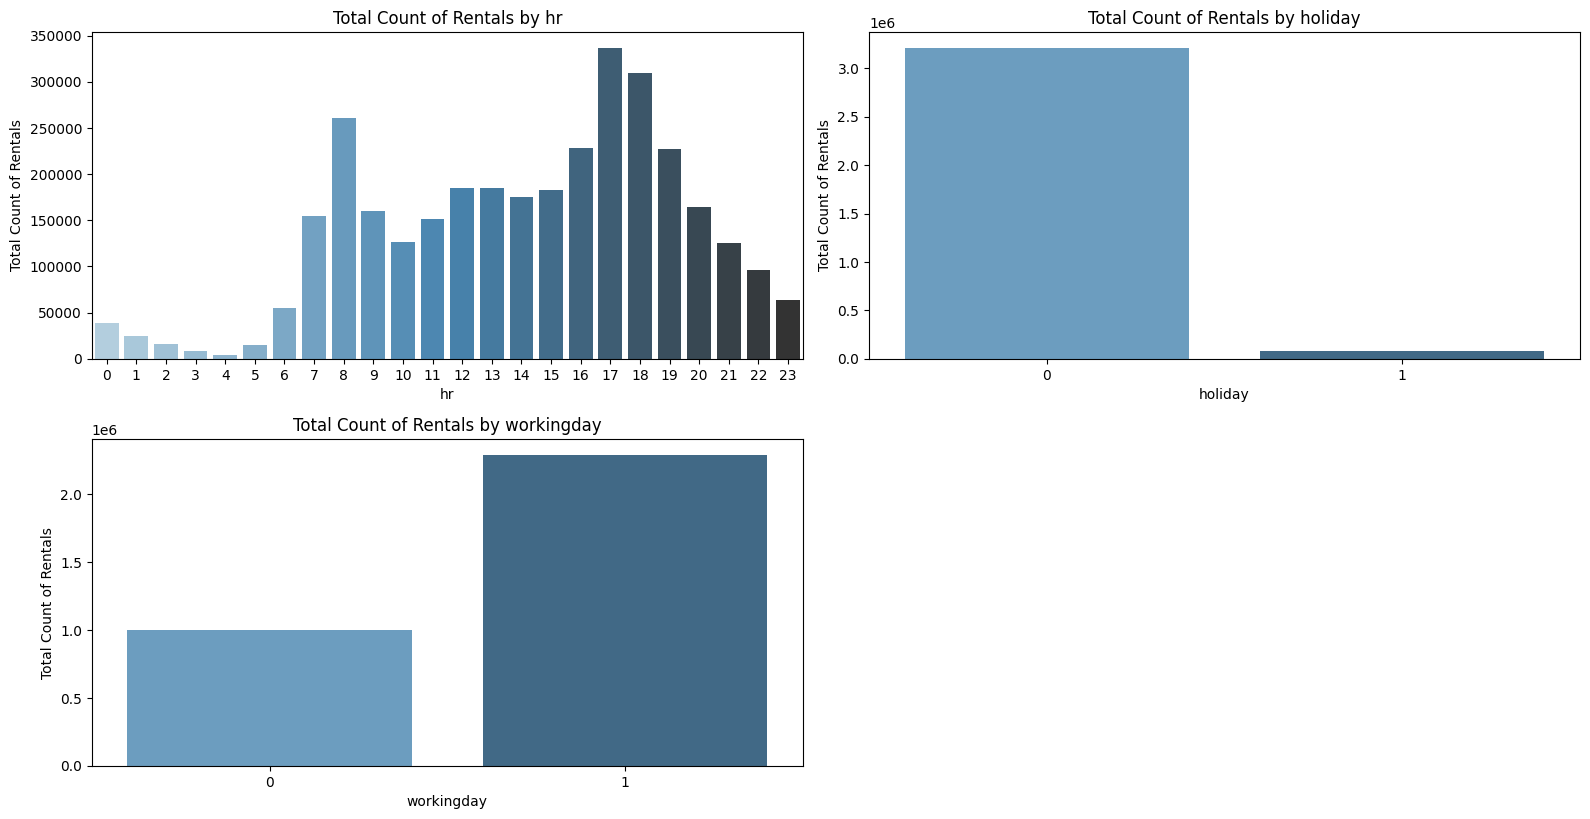

In [21]:
day_vars = [ 'hr','holiday', 'workingday']
plt.figure(figsize=(16, 16))

# Buat bar plot untuk setiap variabel kategorikal
for i, var in enumerate(day_vars):
    plt.subplot(4, 2, i + 1)  # 4 baris, 2 kolom
    # Menghitung total cnt per kategori
    total_cnt = df.groupby(var)['cnt'].sum().reset_index()
    sns.barplot(data=total_cnt, x=var, y='cnt', palette='Blues_d', hue=var, legend=False)
    plt.title(f'Total Count of Rentals by {var}')
    plt.xlabel(var)
    plt.ylabel('Total Count of Rentals')
    

plt.tight_layout()
plt.show()

**Insight answer From visualitation**
- Pengaruh Hari kerja dan hari libur pada jumlah sewa sepeda sangat berpengaruh di jumlah sewa sepeda , Bisa dilihat di tabel "Total count of rentals by  holiday" jumlah sewa sepeda sangat tinggi saat  liburan dibanding dengan tidak liburan 
- untuk bukti lain ada di diagram " Total count of rentals by workingday " dimana untuk hari kerja jumlah sewa sepeda lebih tinggi dibanging bukan hari kerja
- untuk pertimbangan lain ada di diagram "Total count by hr" dimana penyewaan kebanyakan berada pada jam kerja yaitu antar jam 7:00 - 18:00 

### Pertanyaan 2:Bagaimana  pengaruh kondisi iklim/cuaca pada penyewaan sepeda?

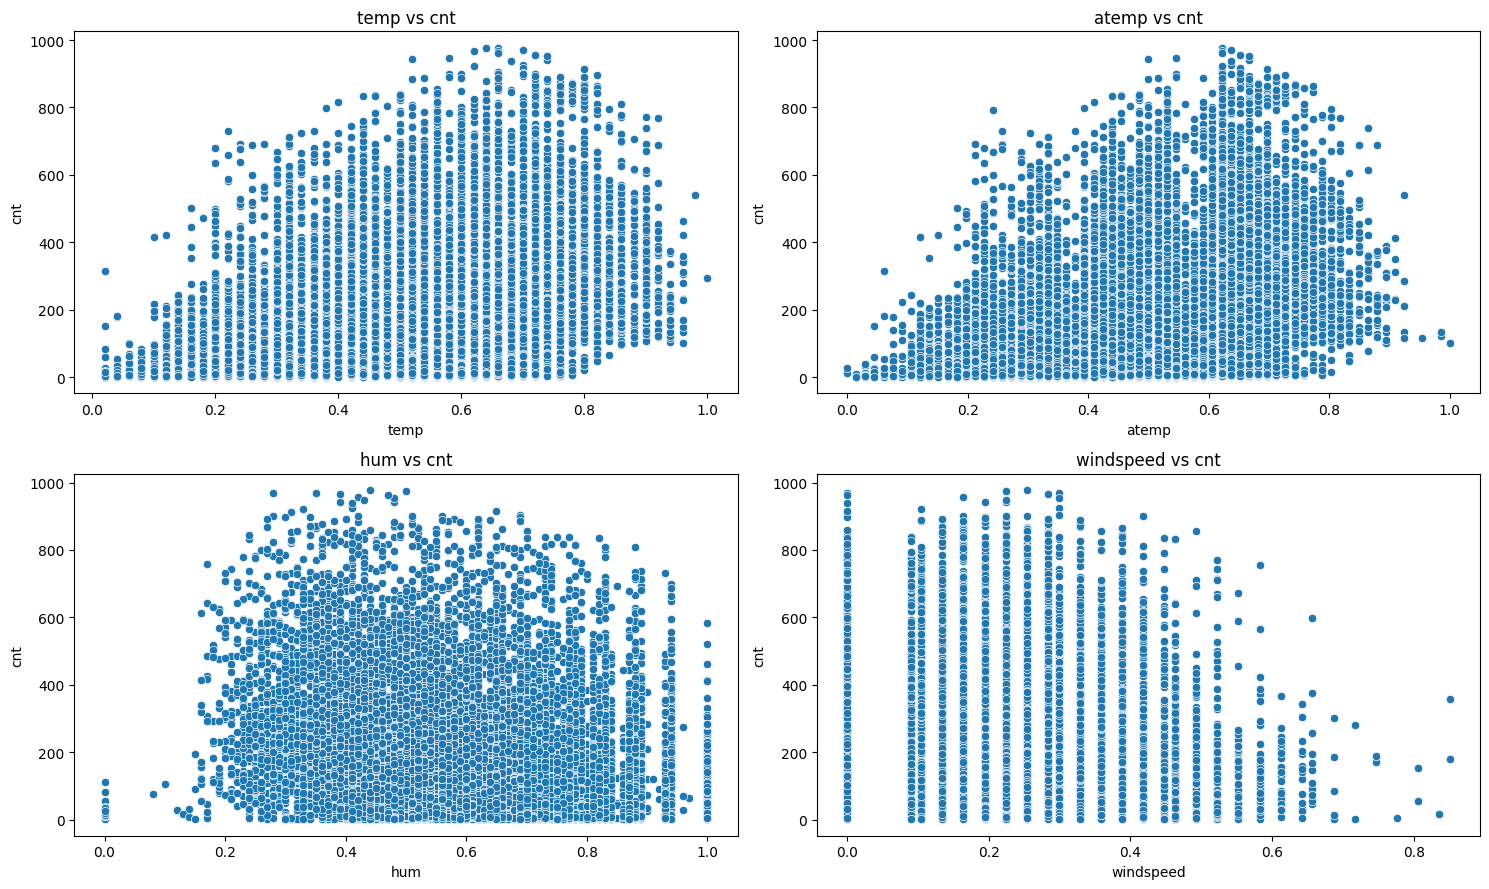

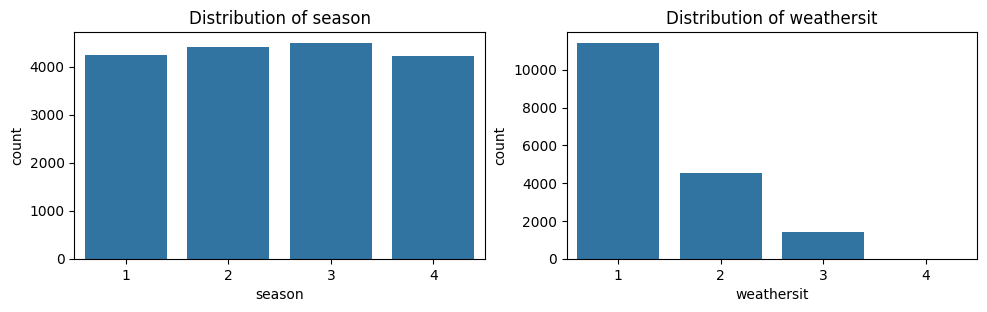

In [17]:
plt.figure(figsize=(15, 9))

# List of numerical variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed']

# Plot scatter plots for numerical variables vs cnt
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=var, y='cnt')
    plt.title(f'{var} vs cnt')

plt.tight_layout()
plt.show()
plt.figure(figsize=(18, 10))

weather_vars = ['season', 'weathersit']

for i, var in enumerate(weather_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution of {var}')

**Insight**
- Temperatur mempengaruhi jumlah sewa sepeda angka derivatif suhu yang ideal dalam penyewaan sepeda adalah 0.6 - 0.8
- Humidity juga berpengaruh pada jumlah sewa sepeda parameter humidity yang ideal dalam penyewaan sepeda adalah 0.2 - 0.5
- Windspeed berpengaruh negatif dalam jumlah sewa sepeda , semakin tinggi windspeed semakin kecil jumlah penyewaan sepeda
- Kategori iklim sangat berpengaruh dalam penyewaan sepeda
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
   
   Penyewaan sepeda lebih banyak saat cuaca cerah , semakin buruk cuaca jumlah penyewaan sepeda semakin sedikit

### Pertanyaan 3 : Bagaimana kondisi penyewaan sepeda dalam dua tahun terakhir?

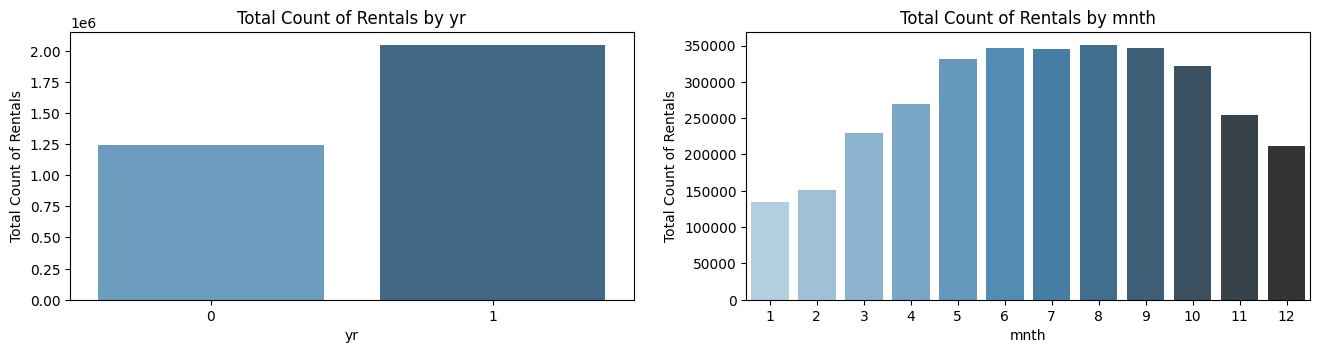

In [22]:
year_vars = ['yr', 'mnth']

plt.figure(figsize=(16, 16))

# Buat bar plot untuk setiap variabel kategorikal
for i, var in enumerate(year_vars):
    plt.subplot(4, 2, i + 1)  # 4 baris, 2 kolom
    # Menghitung total cnt per kategori
    total_cnt = df.groupby(var)['cnt'].sum().reset_index()
    sns.barplot(data=total_cnt, x=var, y='cnt', palette='Blues_d', hue=var, legend=False)
    plt.title(f'Total Count of Rentals by {var}')
    plt.xlabel(var)
    plt.ylabel('Total Count of Rentals')

**Insight:**
- Dalam dua tahun terakhir penyewaan sepeda mengalami kenaikan yang signifikan , kenaikan pada tahun 2012 hampir 2x lipat daripada tahun 2011
- Selain itu penyewaan paling banyak di antara bulan 5-10 dan pada bulan 11-12 terjadi penurunan yang lumayan signifikan dari bulan sebelumnya

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1

Berdasarkan analisis visualisasi, penyewaan sepeda menunjukkan pola yang menarik. Jumlah penyewaan cenderung tinggi pada hari kerja, menandakan banyak orang menggunakan sepeda sebagai moda transportasi untuk bekerja. Sebaliknya, pada hari libur, penyewaan sepeda menurun signifikan, menunjukkan bahwa orang lebih memilih untuk beristirahat atau menggunakan transportasi lain saat tidak bekerja. Dengan demikian, sepeda berperan penting dalam mobilitas harian, terutama di hari kerja, dan ada potensi untuk meningkatkan penyewaan pada hari libur dengan strategi yang tepat.
- Conclution pertanyaan 2

Dalam bisnis penyewaan sepeda, memperhatikan faktor cuaca sangatlah penting, terutama parameter seperti kelembapan, suhu, dan kecepatan angin. Kelembapan yang tinggi dapat membuat pengalaman bersepeda menjadi tidak nyaman, sementara suhu yang ideal berada dalam rentang sejuk, karena suhu yang terlalu panas atau dingin dapat mengurangi minat orang untuk bersepeda. Selain itu, kecepatan angin yang tinggi juga dapat membuat bersepeda sulit dan berpotensi berbahaya, sehingga pelanggan mungkin enggan menyewa sepeda dalam kondisi tersebut. Situasi cuaca yang ideal untuk penyewaan sepeda adalah saat cerah dan nyaman. Oleh karena itu, pemilik bisnis harus memantau kondisi cuaca secara rutin dan mengoptimalkan strategi penyewaan mereka untuk menarik lebih banyak pelanggan pada hari-hari yang mendukung kegiatan bersepeda.
- Conclution pertanyaan 3

Dalam dua tahun terakhir, penyewaan sepeda mengalami kenaikan yang signifikan, dengan angka penyewaan pada tahun 2012 hampir dua kali lipat dibandingkan tahun 2011. Peningkatan ini menunjukkan bahwa semakin banyak orang yang memilih sepeda sebagai alternatif transportasi. Selain itu, analisis berdasarkan bulan menunjukkan bahwa penyewaan sepeda paling tinggi terjadi antara bulan Mei hingga Oktober, yang mungkin disebabkan oleh cuaca yang lebih baik dan aktivitas luar ruangan yang meningkat. Sebaliknya, pada bulan November dan Desember, terdapat penurunan signifikan dalam jumlah penyewaan dibandingkan bulan-bulan sebelumnya, kemungkinan karena cuaca yang kurang mendukung dan meningkatnya aktivitas dalam ruangan. Dengan demikian, penting bagi pemilik bisnis penyewaan sepeda untuk merencanakan strategi pemasaran dan promosi yang sesuai dengan pola musiman ini.
